In [2]:
import pandas as pd

# Load the dataset
ev_data = pd.read_csv("/content/Electric_Vehicle_Population_Data.csv")  # Replace 'ev_dataset.csv' with your actual file name

# Display basic information about the dataset
print(ev_data.info())

# Display summary statistics
print(ev_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98724 entries, 0 to 98723
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         98724 non-null  object 
 1   County                                             98721 non-null  object 
 2   City                                               98721 non-null  object 
 3   State                                              98724 non-null  object 
 4   Postal Code                                        98721 non-null  float64
 5   Model Year                                         98724 non-null  int64  
 6   Make                                               98724 non-null  object 
 7   Model                                              98516 non-null  object 
 8   Electric Vehicle Type                              98724 non-null  object 
 9   Clean 

In [3]:
# Handle missing values
ev_data = ev_data.dropna()  # Remove rows with missing values

# Convert categorical variables to numerical (if needed)
# Example: ev_data['fuel_type'] = pd.get_dummies(ev_data['fuel_type'])


In [4]:
from sklearn.cluster import KMeans

# Select relevant features for segmentation
features_for_segmentation = ev_data[['Electric Range', 'Base MSRP', 'State', 'Model Year', 'County', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']]

# Handle categorical variables
features_for_segmentation = pd.get_dummies(features_for_segmentation, columns=['State', 'Model Year', 'County', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'], drop_first=True)

# Standardize features if necessary
from sklearn.preprocessing import StandardScaler
features_for_segmentation = StandardScaler().fit_transform(features_for_segmentation)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
ev_data['segment'] = kmeans.fit_predict(features_for_segmentation)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


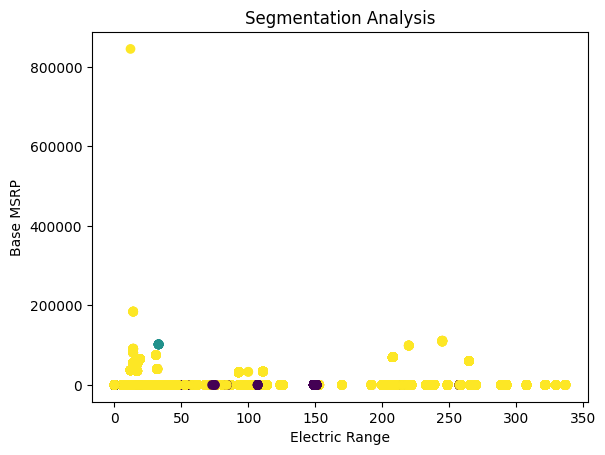

In [5]:
import matplotlib.pyplot as plt

# Visualize the clusters
plt.scatter(ev_data['Electric Range'], ev_data['Base MSRP'], c=ev_data['segment'], cmap='viridis')
plt.title('Segmentation Analysis')
plt.xlabel('Electric Range')
plt.ylabel('Base MSRP')
plt.show()


<ipython-input-16-7c55b8bb1437>:13: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


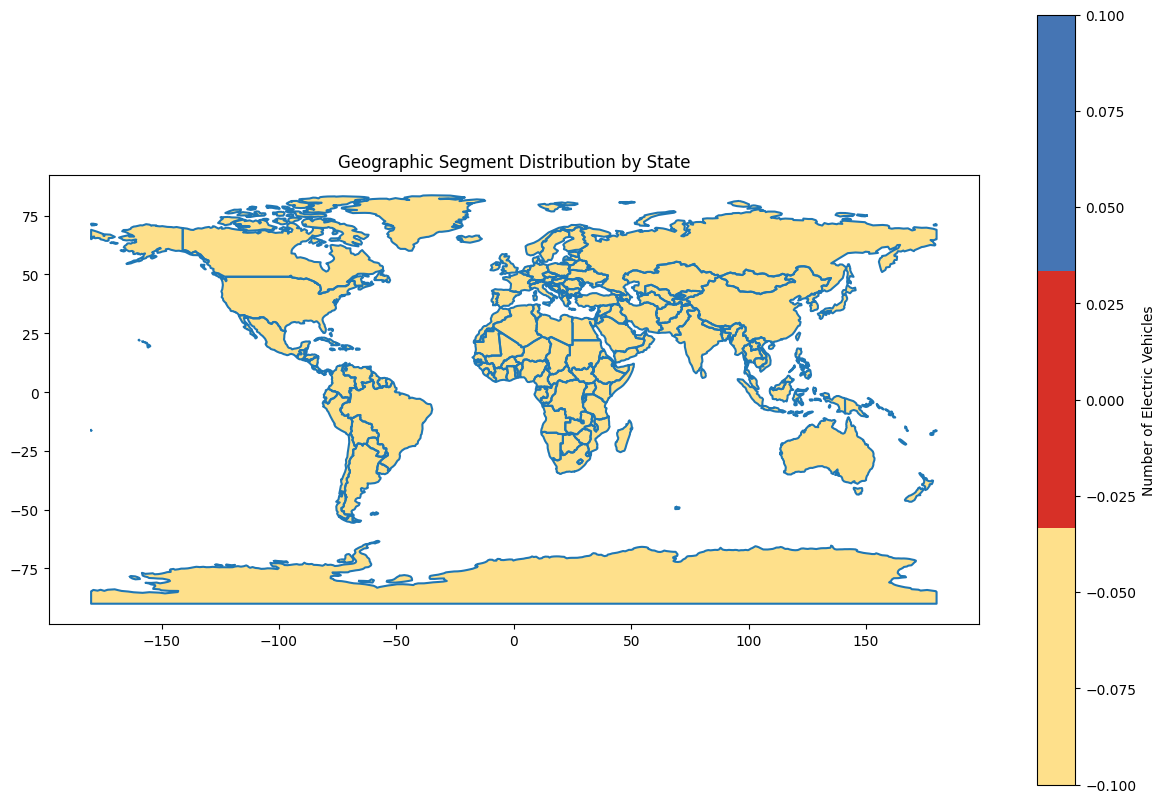

In [16]:
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.colors import ListedColormap

# Remove rows with missing 'State' values
ev_data_geo = ev_data.dropna(subset=['State'])

# Geographic segmentation - State distribution on a map
state_counts = ev_data_geo['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge data with the GeoDataFrame
state_geo = world.merge(state_counts, left_on='iso_a3', right_on='State', how='left')

# Fill NaN values with 0
state_geo['Count'] = state_geo['Count'].fillna(0)

# Create a categorical colormap
cmap = ListedColormap(['#fee08b', '#d73027', '#4575b4'])  # Adjust colors as needed

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
state_geo.boundary.plot(ax=ax)
state_geo.plot(column='Count', legend=True, ax=ax, legend_kwds={'label': "Number of Electric Vehicles"}, cmap=cmap)
plt.title('Geographic Segment Distribution by State')
plt.show()


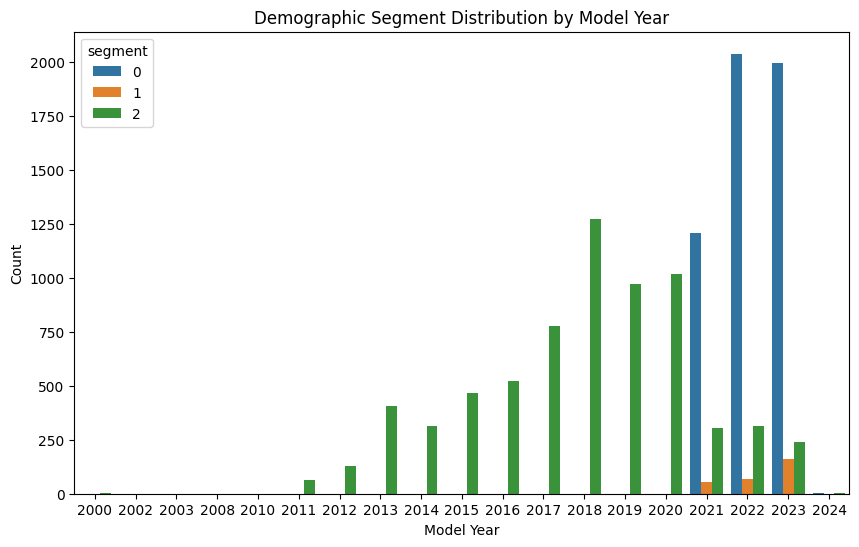

In [18]:
# Demographic segmentation - Model Year distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Model Year', data=ev_data, hue='segment')
plt.title('Demographic Segment Distribution by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.show()


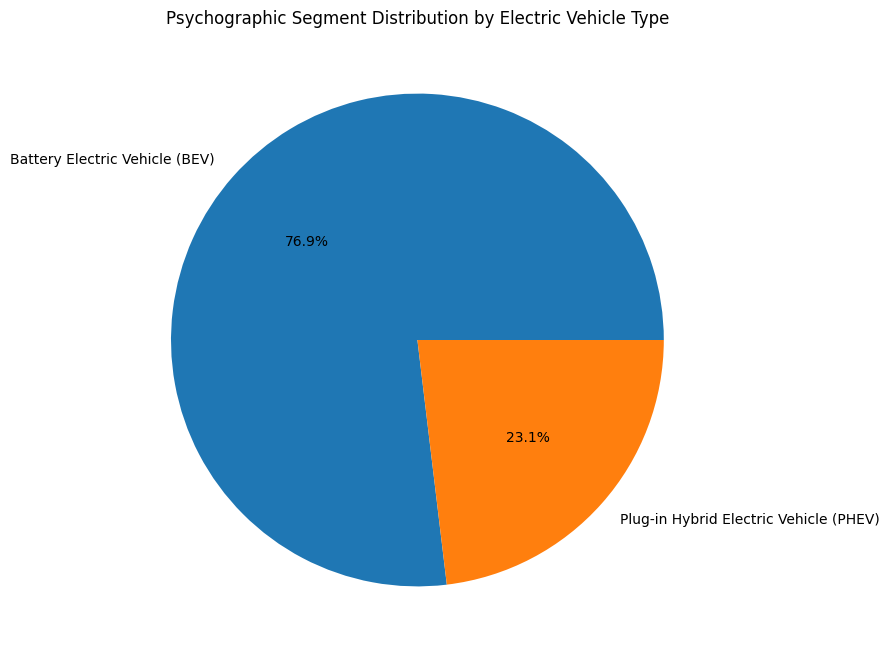

In [19]:
# Psychographic segmentation - Electric Vehicle Type distribution as a pie chart
plt.figure(figsize=(8, 8))
ev_data['Electric Vehicle Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Psychographic Segment Distribution by Electric Vehicle Type')
plt.ylabel('')
plt.show()


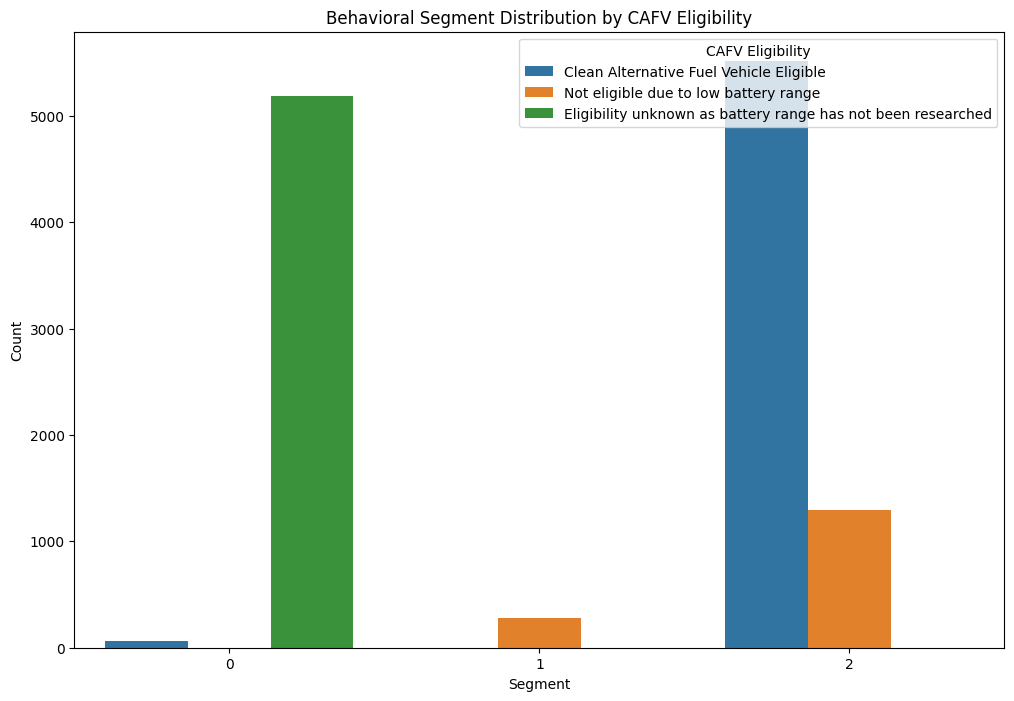

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Behavioral segmentation - Stacked bar chart for CAFV Eligibility within each segment
plt.figure(figsize=(12, 8))
sns.countplot(x='segment', hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility', data=ev_data)
plt.title('Behavioral Segment Distribution by CAFV Eligibility')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.legend(title='CAFV Eligibility')
plt.show()
